<a href="https://www.kaggle.com/code/adityaraghuvanshi999/project1-bilstm?scriptVersionId=128446836" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import fasttext
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
# @title Figure Settings
import ipywidgets as widgets
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/content-creation/main/nma.mplstyle")

In [3]:
# @title Helper functions
def cosine_similarity(vec_a, vec_b):
  """Compute cosine similarity between vec_a and vec_b"""
  return np.dot(vec_a, vec_b) / (np.linalg.norm(vec_a) * np.linalg.norm(vec_b))


def getSimilarity(word1, word2):
  v1 = ft_en_vectors.get_word_vector(word1)
  v2 = ft_en_vectors.get_word_vector(word2)
  return cosine_similarity(v1, v2)

In [4]:
# @title Set random seed

# @markdown Executing `set_seed(seed=seed)` you are setting the seed

# For DL its critical to set the random seed so that students can have a
# baseline to compare their results to expected results.
# Read more here: https://pytorch.org/docs/stable/notes/randomness.html

# Call `set_seed` function in the exercises to ensure reproducibility.
import random
import torch

def set_seed(seed=None, seed_torch=True):
  """
  Function that controls randomness.
  NumPy and random modules must be imported.

  Args:
    seed : Integer
      A non-negative integer that defines the random state. Default is `None`.
    seed_torch : Boolean
      If `True` sets the random seed for pytorch tensors, so pytorch module
      must be imported. Default is `True`.

  Returns:
    Nothing.
  """
  if seed is None:
    seed = np.random.choice(2 ** 32)
  random.seed(seed)
  np.random.seed(seed)
  if seed_torch:
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

  print(f'Random seed {seed} has been set.')

# In case that `DataLoader` is used
def seed_worker(worker_id):
  """
  DataLoader will reseed workers following randomness in
  multi-process data loading algorithm.

  Args:
    worker_id: integer
      ID of subprocess to seed. 0 means that
      the data will be loaded in the main process
      Refer: https://pytorch.org/docs/stable/data.html#data-loading-randomness for more details

  Returns:
    Nothing
  """
  worker_seed = torch.initial_seed() % 2**32
  np.random.seed(worker_seed)
  random.seed(worker_seed)

In [5]:
# @title Set device (GPU or CPU). Execute `set_device()`

# Inform the user if the notebook uses GPU or CPU.

def set_device():
  """
  Set the device. CUDA if available, CPU otherwise

  Args:
    None

  Returns:
    Nothing
  """
  device = "cuda" if torch.cuda.is_available() else "cpu"
  if device != "cuda":
    print("WARNING: For this notebook to perform best, "
        "if possible, in the menu under `Runtime` -> "
        "`Change runtime type.`  select `GPU` ")
  else:
    print("GPU is enabled in this notebook.")

  return device

In [6]:
DEVICE = set_device()
SEED = 2021
set_seed(seed=SEED)

Random seed 2021 has been set.


In [7]:
# # @markdown ### Download FastText English Embeddings of dimension 100
# # @markdown This will take 1-2 minutes to run

# import os, zipfile, requests

# url = "https://osf.io/2frqg/download"
# fname = "cc.en.100.bin.gz"

# print('Downloading Started...')
# # Downloading the file by sending the request to the URL
# r = requests.get(url, stream=True)

# # Writing the file to the local file system
# with open(fname, 'wb') as f:
#   f.write(r.content)
# print('Downloading Completed.')

# # opening the zip file in READ mode
# with zipfile.ZipFile(fname, 'r') as zipObj:
#   # extracting all the files
#   print('Extracting all the files now...')
#   zipObj.extractall()
#   print('Done!')
#   os.remove(fname)

In [8]:
# # Load 100 dimension FastText Vectors using FastText library
# ft_en_vectors = fasttext.load_model('cc.en.100.bin')

In [9]:
# # @markdown ### Download FastText French Embeddings of dimension 100

# # @markdown **Note:** This cell might take 2-4 minutes to run

# import os, zipfile, requests

# url = "https://osf.io/rqadk/download"
# fname = "cc.es.100.bin.gz"

# print('Downloading Started...')
# # Downloading the file by sending the request to the URL
# r = requests.get(url, stream=True)

# # Writing the file to the local file system
# with open(fname, 'wb') as f:
#   f.write(r.content)
# print('Downloading Completed.')

# # opening the zip file in READ mode
# with zipfile.ZipFile(fname, 'r') as zipObj:
#   # extracting all the files
#   print('Extracting all the files now...')
#   zipObj.extractall()
#   print('Done!')
#   os.remove(fname)

In [10]:
# # Load 100 dimension FastText Vectors using FastText library
# french = fasttext.load_model('cc.es.100.bin')

In [11]:
# import fasttext.util
# # fasttext.util.download_model('en', if_exists='ignore')  # English
# # ft_en_vectors = fasttext.load_model('/kaggle/input/fasttext-crawl-300d-2m/crawl-300d-2M.vec')
# from gensim.models import KeyedVectors

# # Load the pre-trained word embeddings using gensim
# ft_en_vectors = KeyedVectors.load_word2vec_format('/kaggle/input/fasttext-crawl-300d-2m/crawl-300d-2M.vec')

# # # Get the word vector for a specific word
# word_vector = word_vectors['example']


In [12]:
import fasttext.util
# fasttext.util.download_model('es', if_exists='ignore')  # English
ft_en_vectors = fasttext.load_model('/kaggle/input/fasttext-pretrained-crawl-vector-en-bin/cc.en.300.bin')

In [13]:
import fasttext.util
# fasttext.util.download_model('es', if_exists='ignore')  # English
ft_es_vectors = fasttext.load_model('/kaggle/input/fasttext-spanish-300/cc.es.300.bin')

Lets see similarity without making bilingual embedding

In [14]:
hello = ft_en_vectors.get_word_vector('hello')
hi = ft_en_vectors.get_word_vector('hi')
hola = ft_es_vectors.get_word_vector('hola')

print(f"Cosine Similarity between HI and HELLO: {cosine_similarity(hello, hi)}")
print(f"Cosine Similarity between HOLA and HELLO: {cosine_similarity(hello, hola)}")

Cosine Similarity between HI and HELLO: 0.7038338780403137
Cosine Similarity between HOLA and HELLO: -0.19758674502372742


In [15]:
cat = ft_en_vectors.get_word_vector('cat')
chatte = ft_es_vectors.get_word_vector('chatte')
chat = ft_es_vectors.get_word_vector('chat')

print(f"Cosine Similarity between cat and chatte: {cosine_similarity(cat, chatte)}")
print(f"Cosine Similarity between cat and chat: {cosine_similarity(cat, chat)}")
print(f"Cosine Similarity between chatte and chat: {cosine_similarity(chatte, chat)}")

Cosine Similarity between cat and chatte: 0.03497544303536415
Cosine Similarity between cat and chat: -0.014095021411776543
Cosine Similarity between chatte and chat: 0.3689819574356079


In [16]:
en_words = set(ft_en_vectors.words)
es_words = set(ft_es_vectors.words)
overlap = list(en_words & es_words)
bilingual_dictionary = [(entry, entry) for entry in overlap]

In [17]:
# print(bilingual_dictionary)

In [18]:
def make_training_matrices(source_dictionary, target_dictionary,
                           bilingual_dictionary):
  source_matrix = []
  target_matrix = []
  for (source, target) in tqdm(bilingual_dictionary):
    # if source in source_dictionary.words and target in target_dictionary.words:
    source_matrix.append(source_dictionary.get_word_vector(source))
    target_matrix.append(target_dictionary.get_word_vector(target))
  # return training matrices
  return np.array(source_matrix), np.array(target_matrix)


# from https://stackoverflow.com/questions/21030391/how-to-normalize-array-numpy
def normalized(a, axis=-1, order=2):
  """Utility function to normalize the rows of a numpy array."""
  l2 = np.atleast_1d(np.linalg.norm(a, order, axis))
  l2[l2==0] = 1
  return a / np.expand_dims(l2, axis)


def learn_transformation(source_matrix, target_matrix, normalize_vectors=True):
  """
  Source and target matrices are numpy arrays, shape
  (dictionary_length, embedding_dimension). These contain paired
  word vectors from the bilingual dictionary.
  """
  # optionally normalize the training vectors
  if normalize_vectors:
    source_matrix = normalized(source_matrix)
    target_matrix = normalized(target_matrix)
  # perform the SVD
  product = np.matmul(source_matrix.transpose(), target_matrix)
  U, s, V = np.linalg.svd(product)
  # return orthogonal transformation which aligns source language to the target
  return np.matmul(U, V)

In [19]:
source_training_matrix, target_training_matrix = make_training_matrices(ft_en_vectors, ft_es_vectors, bilingual_dictionary)

  0%|          | 0/595407 [00:00<?, ?it/s]

In [20]:
transform = learn_transformation(source_training_matrix, target_training_matrix)

Let’s run the same examples as above, but this time, whenever we use French words, the matrix multiplies the embedding by the transpose of the transform matrix. That works a lot better!

In [21]:
hello = ft_en_vectors.get_word_vector('hello')
hi = ft_en_vectors.get_word_vector('hi')
hola = np.matmul(ft_es_vectors.get_word_vector('hola'), transform.T)

print(f"Cosine Similarity between HI and HELLO: {cosine_similarity(hello, hi)}")
print(f"Cosine Similarity between HOLA and HELLO: {cosine_similarity(hello, hola)}")

Cosine Similarity between HI and HELLO: 0.7038338780403137
Cosine Similarity between HOLA and HELLO: 0.5260576009750366


In [22]:
cat = ft_en_vectors.get_word_vector('cat')
chatte = np.matmul(ft_es_vectors.get_word_vector('chatte'), transform.T)
chat = np.matmul(ft_es_vectors.get_word_vector('chat'), transform.T)

print(f"Cosine Similarity between cat and chatte: {cosine_similarity(cat, chatte)}")
print(f"Cosine Similarity between cat and chat: {cosine_similarity(cat, chat)}")
print(f"Cosine Similarity between chatte and chat: {cosine_similarity(chatte, chat)}")

Cosine Similarity between cat and chatte: 0.2523723840713501
Cosine Similarity between cat and chat: 0.11947458237409592
Cosine Similarity between chatte and chat: 0.3689819872379303


In [23]:
# print(ft_es_vectors.words)

# for word in ft_es_vectors.words:
#     ft_es_vectors.get_word_vector(word)
# print(len(transform.T))

In [24]:
# print(ft_en_vectors.words)

In [25]:
def get_sentence_embedding_en(sentence, max_length=30):
        words = sentence
        # filter out words that are not present in the model's vocabulary
        words = [word for word in words if word in ft_en_vectors.words ]
        # generate word embeddings for each word
        embeddings = [ft_en_vectors.get_word_vector(word) for word in words]
        #mean strategy
        embedding = np.mean(embeddings, axis=0)
        return embedding
    
def get_sentence_embedding_es(sentence, max_length=30):
        words = sentence
        # filter out words that are not present in the model's vocabulary
        words = [word for word in words if word in ft_es_vectors.words ]
        # generate word embeddings for each word
        embeddings = [np.matmul(ft_es_vectors.get_word_vector(word), transform.T) for word in words]
        #mean strategy
        embedding = np.mean(embeddings, axis=0)
        return embedding

In [26]:
eng = get_sentence_embedding_en ( ['hey', 'friends'])
spa = get_sentence_embedding_es ( [ 'hola', 'amigos'])
def sts_score(sim_score):
    sts_score = (sim_score+1) * 2.5
    return sts_score
from scipy import spatial
def get_sts_scores(emb1, emb2):
    sim_score = 1 - spatial.distance.cosine(emb1, emb2)
    return sim_score

normalized_cos_scores = sts_score(get_sts_scores(eng, spa))
print(normalized_cos_scores)

3.694225326180458


In [27]:
import numpy as np
import re
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from gensim.models import KeyedVectors
import nltk
# nltk.download()
import nltk

# from sts_utils import load_file, sts_score, get_sts_scores

In [28]:
# import nltk
# from nltk.stem import WordNetLemmatizer
# from nltk.stem import PorterStemmer
# lemmatizer = WordNetLemmatizer()
# ps = PorterStemmer()
# from scipy import spatial

# def preprocess_text(text):
#     # Remove punctuation
#     text = re.sub(r'[^\w\s]', '', text)
#     # Replace numbers with num
#     text = re.sub(r'\d+', '', text)
#     # Lower case
#     text = text.lower()
#     sent_token = text.split()
#     # Lemmatize
#     sent_token = [lemmatizer.lemmatize(word) for word in sent_token]
#     # Stemming
#     sent_token = [ps.stem(word) for word in sent_token]
#     return sent_token
    
# def sts_score(sim_score):
#     sts_score = (sim_score+1) * 2.5
#     return sts_score
# def get_sts_scores(emb1, emb2):
#     sim_score = 1 - spatial.distance.cosine(emb1, emb2)
#     return sim_score

# def generate_similarity_score(sent1, sent2):
#         sent1_token = preprocess_text(sent1)
#         sent2_token = preprocess_text(sent2)
# #         sent1_unk_token = [self.unk_replace(word, self.word_dict) for word in sent1_token]
# #         sent2_unk_token = [self.unk_replace(word, self.word_dict) for word in sent2_token]
#         sent1_embedding = get_sentence_embedding_en(sent1_token)
#         sent2_embedding = get_sentence_embedding_es(sent2_token)
#         normalized_cos_scores = sts_score(get_sts_scores(sent1_embedding, sent2_embedding))
#         return normalized_cos_scores

In [29]:
# if __name__ == "__main__":
#     """Sample input sentences to try:
#     input1: Where is Swaroop going
#     input2: Swaroop is leaving to college now
#     """
#     input1 = input("Enter your first sentence:\t")
#     input2 = input("Enter your second sentence:\t")
#     print("Generating the similarity score......")
# #     sts = STS_Score()
#     print("The semantic similarity score is", generate_similarity_score(input1, input2))
#     print("The explainability can be generated through sts_explainability module ")

# Import of Dataset and Cleaning

In [30]:
import pandas as pd
import numpy as np

In [31]:
# English
train_df_en = pd.read_csv('/kaggle/input/aaa1111/STS-train/data/stsb-multi-mt-main/data/stsb-en-train.csv', usecols=[0,1,2], names=['sent1', 'sent2', 'score'], header=None)
val_df_en = pd.read_csv('/kaggle/input/aaa1111/STS-train/data/stsb-multi-mt-main/data/stsb-en-dev.csv', usecols=[0,1,2], names=['sent1', 'sent2', 'score'], header=None)
test_df_en = pd.read_csv('/kaggle/input/aaa1111/STS-train/data/stsb-multi-mt-main/data/stsb-en-test.csv', usecols=[0,1,2], names=['sent1', 'sent2', 'score'], header=None)

# Spanish
train_df_es = pd.read_csv('/kaggle/input/aaa1111/STS-train/data/stsb-multi-mt-main/data/stsb-es-train.csv', usecols=[0,1,2], names=['sent1', 'sent2', 'score'], header=None)
val_df_es = pd.read_csv('/kaggle/input/aaa1111/STS-train/data/stsb-multi-mt-main/data/stsb-es-dev.csv', usecols=[0,1,2], names=['sent1', 'sent2', 'score'], header=None)
test_df_es = pd.read_csv('/kaggle/input/aaa1111/STS-train/data/stsb-multi-mt-main/data/stsb-es-test.csv', usecols=[0,1,2], names=['sent1', 'sent2', 'score'], header=None)

In [32]:
train_df_en.head()

,sent1,sent2,score
0,A plane is taking off.,An air plane is taking off.,5.00
1,A man is playing a large flute.,A man is playing a flute.,3.80
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,3.80
3,Three men are playing chess.,Two men are playing chess.,2.60
4,A man is playing the cello.,A man seated is playing the cello.,4.25


In [33]:
import pandas as pd
import numpy as np
import nltk
import re
from sklearn.linear_model import LinearRegression
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [34]:
#Statistics
print("Train data size", len(train_df_en))
print("Val data size", len(val_df_en))
print("Test data size", len(test_df_en))

Train data size 5749
Val data size 1500
Test data size 1379


In [35]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [36]:
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()

In [37]:
def preprocess_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Replace numbers with num
    text = re.sub(r'\d+', '', text)
    # Lower case
    text= text.lower()
    sent_token = text.split()
    # Lemmatize
#     sent_token = [lemmatizer.lemmatize(word) for word in sent_token]
    # Stemming
#     sent_token = [ps.stem(word) for word in sent_token]
    return sent_token

In [38]:
train_df_en['sent1'] = train_df_en['sent1'].apply(lambda x: preprocess_text(x))
train_df_en['sent2'] = train_df_en['sent2'].apply(lambda x: preprocess_text(x))

train_df_es['sent1'] = train_df_es['sent1'].apply(lambda x: preprocess_text(x))
train_df_es['sent2'] = train_df_es['sent2'].apply(lambda x: preprocess_text(x))

val_df_en['sent1'] = val_df_en['sent1'].apply(lambda x: preprocess_text(x))
val_df_en['sent2'] = val_df_en['sent2'].apply(lambda x: preprocess_text(x))

val_df_es['sent1'] = val_df_es['sent1'].apply(lambda x: preprocess_text(x))
val_df_es['sent2'] = val_df_es['sent2'].apply(lambda x: preprocess_text(x))

test_df_en['sent1'] = test_df_en['sent1'].apply(lambda x: preprocess_text(x))
test_df_en['sent2'] = test_df_en['sent2'].apply(lambda x: preprocess_text(x))

test_df_es['sent1'] = test_df_es['sent1'].apply(lambda x: preprocess_text(x))
test_df_es['sent2'] = test_df_es['sent2'].apply(lambda x: preprocess_text(x))

In [39]:
total_sent_en = list(train_df_en['sent1']) + list(train_df_en['sent2'])
total_sent_es= list(train_df_es['sent1']) + list(train_df_es['sent2'])

In [40]:
print( total_sent_en[:5])

[['a', 'plane', 'is', 'taking', 'off'], ['a', 'man', 'is', 'playing', 'a', 'large', 'flute'], ['a', 'man', 'is', 'spreading', 'shreded', 'cheese', 'on', 'a', 'pizza'], ['three', 'men', 'are', 'playing', 'chess'], ['a', 'man', 'is', 'playing', 'the', 'cello']]


In [41]:
word_dict_en = {}
for word_tokens in total_sent_en:
    for word in word_tokens:
        if word in word_dict_en:
            word_dict_en[word] += 1
        else:
            word_dict_en[word] = 1
            
vocab_length_en = len(word_dict_en)

word_dict_es = {}
for word_tokens in total_sent_es:
    for word in word_tokens:
        if word in word_dict_es:
            word_dict_es[word] += 1
        else:
            word_dict_es[word] = 1
            
vocab_length_es = len(word_dict_es)

In [42]:
print(vocab_length_en, vocab_length_es)

11550 12863


In [43]:
# uni_count_en = 0
# for value in word_dict_en.values():
#     if value == 1:
#         uni_count_en += 1
# print(uni_count_en)

In [44]:
# uni_count_es = 0
# for value in word_dict_es.values():
#     if value == 1:
#         uni_count_es += 1
# print(uni_count_es)

In [45]:
def get_sorted_counter(word_counter):
    return {k: v for k, v in sorted(word_counter.items(), key=lambda item: item[1], reverse=False)}

In [46]:
sorted_counter_en = get_sorted_counter(word_dict_en)
sorted_counter_es = get_sorted_counter(word_dict_es)

In [47]:
sent_dict_en = {}
for sent in total_sent_en:
    if len(sent) in sent_dict_en:
        sent_dict_en[len(sent)] += 1
    else:
        sent_dict_en[len(sent)] = 1

In [48]:
sent_dict_es = {}
for sent in total_sent_es:
    if len(sent) in sent_dict_es:
        sent_dict_es[len(sent)] += 1
    else:
        sent_dict_es[len(sent)] = 1

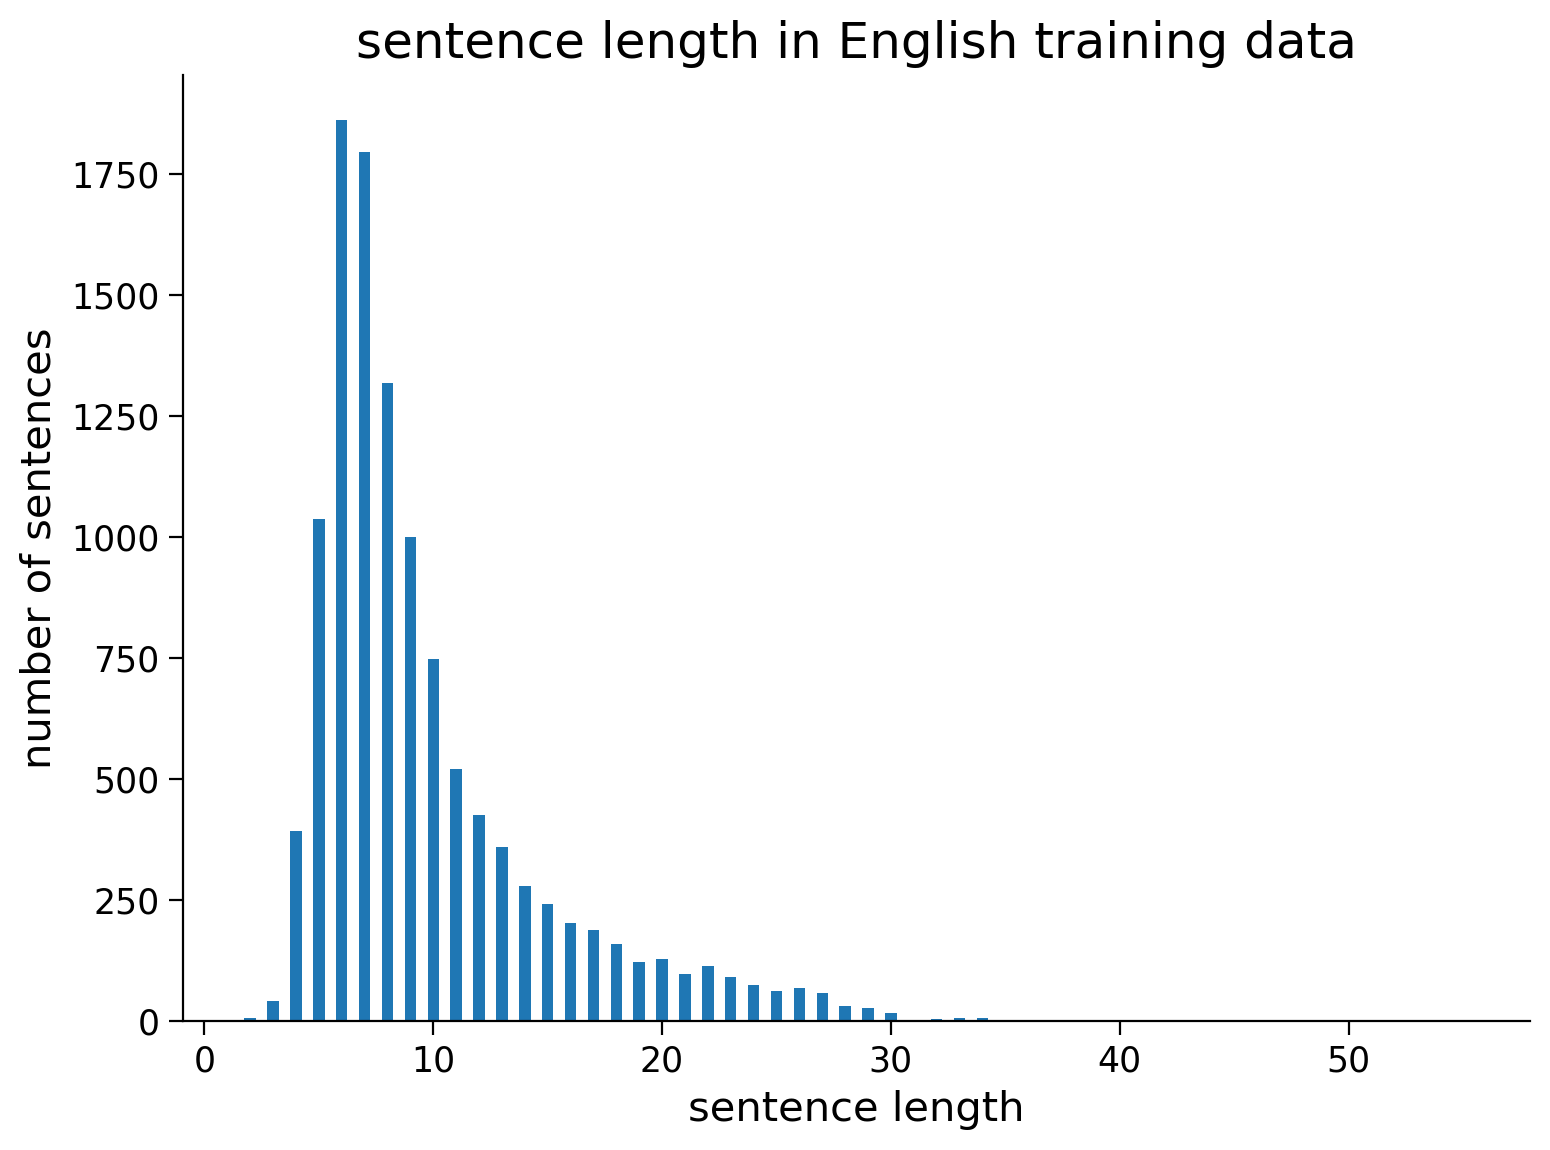

In [49]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(list(sent_dict_en.keys()), list(sent_dict_en.values()), width=0.5)
plt.title("sentence length in English training data")
plt.xlabel("sentence length")
plt.ylabel("number of sentences")
plt.show()

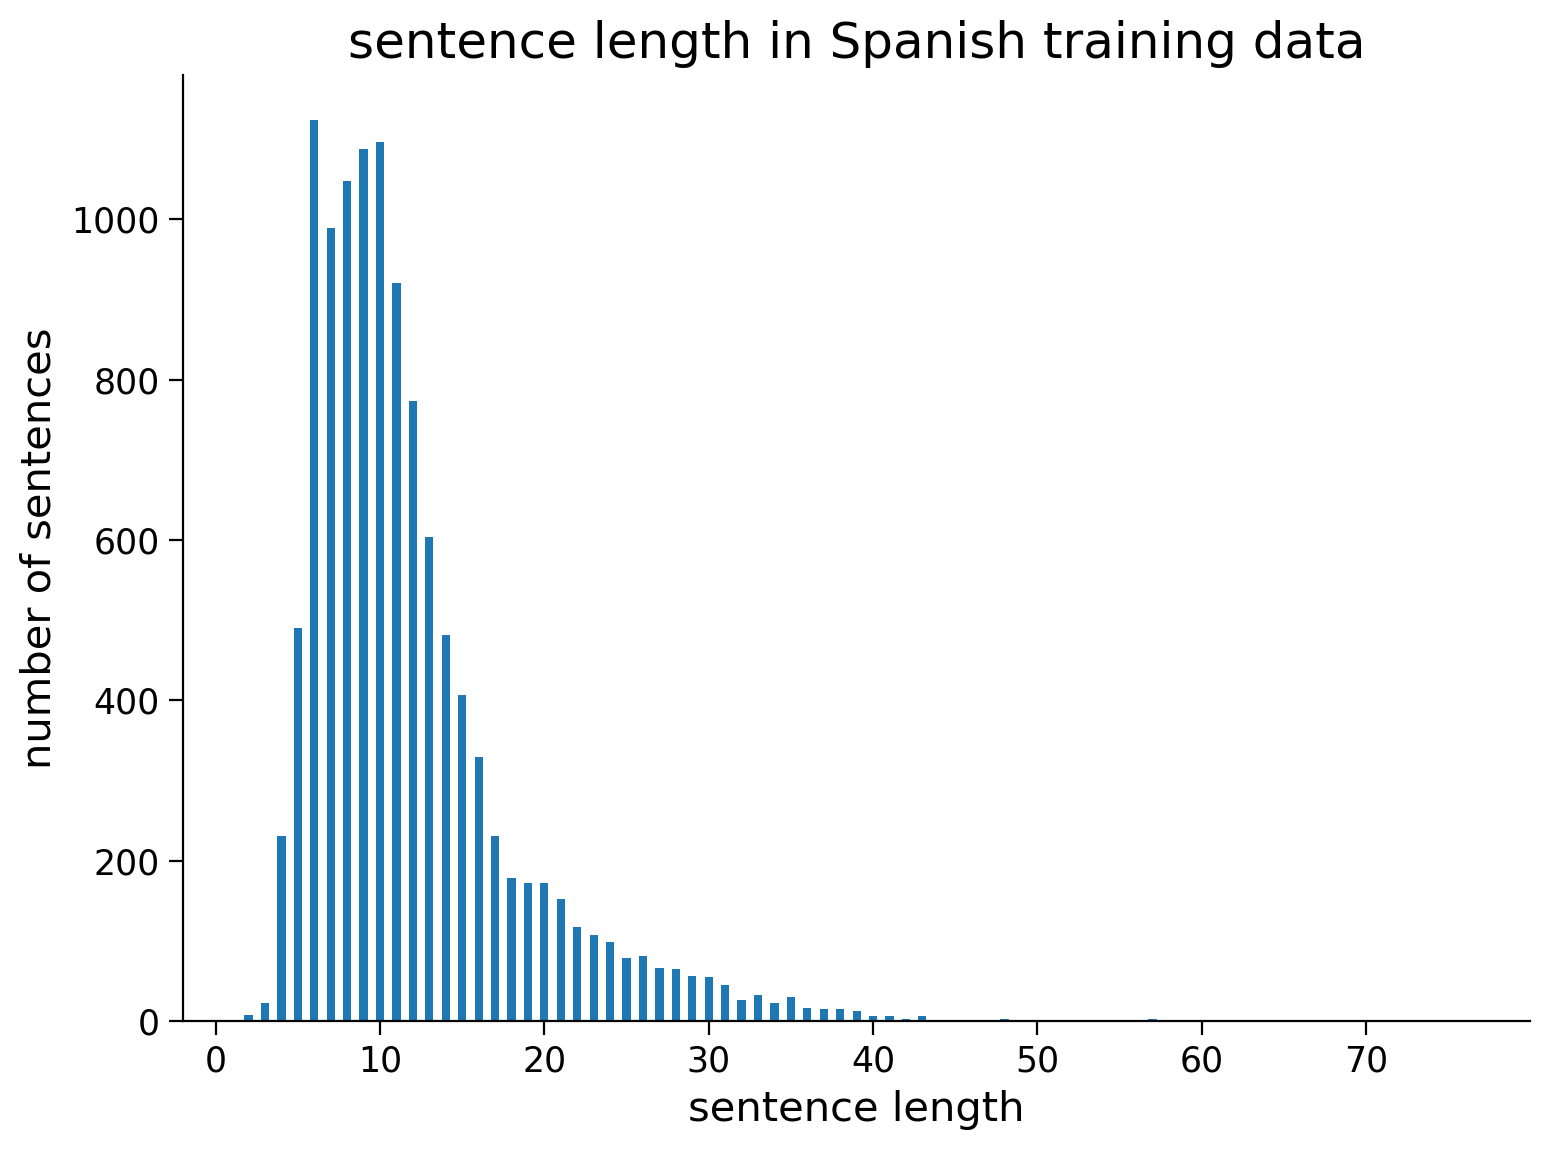

In [50]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(list(sent_dict_es.keys()), list(sent_dict_es.values()), width=0.5)
plt.title("sentence length in Spanish training data")
plt.xlabel("sentence length")
plt.ylabel("number of sentences")
plt.show()

In [51]:
# def unk_replace(word, word_dict):
#     if word not in word_dict:
#         return "unk"
#     else:
#         if word_dict[word] < 2:
#             return "unk"
#     return word

In [52]:
# train_df_en['sent1'] = train_df_en['sent1'].apply(lambda x: [unk_replace(word, word_dict_en) for word in x])
# train_df_en['sent2'] = train_df_en['sent2'].apply(lambda x: [unk_replace(word, word_dict_en) for word in x])

# train_df_es['sent1'] = train_df_es['sent1'].apply(lambda x: [unk_replace(word, word_dict_es) for word in x])
# train_df_es['sent2'] = train_df_es['sent2'].apply(lambda x: [unk_replace(word, word_dict_es) for word in x])

# val_df_en['sent1'] = val_df_en['sent1'].apply(lambda x: [unk_replace(word, word_dict_en) for word in x])
# val_df_en['sent2'] = val_df_en['sent2'].apply(lambda x: [unk_replace(word, word_dict_en) for word in x])

# val_df_es['sent1'] = val_df_es['sent1'].apply(lambda x: [unk_replace(word, word_dict_es) for word in x])
# val_df_es['sent2'] = val_df_es['sent2'].apply(lambda x: [unk_replace(word, word_dict_es) for word in x])

# test_df_en['sent1'] = test_df_en['sent1'].apply(lambda x: [unk_replace(word, word_dict_en) for word in x])
# test_df_en['sent2'] = test_df_en['sent2'].apply(lambda x: [unk_replace(word, word_dict_en) for word in x])

# test_df_es['sent1'] = test_df_es['sent1'].apply(lambda x: [unk_replace(word, word_dict_es) for word in x])
# test_df_es['sent2'] = test_df_es['sent2'].apply(lambda x: [unk_replace(word, word_dict_es) for word in x])

# MODEL

In [53]:
# English
# train_df_en = pd.read_csv('/kaggle/input/aaa1111/STS-train/data/stsb-multi-mt-main/data/stsb-en-train.csv', usecols=[0,1,2], names=['sent1', 'sent2', 'score'], header=None)
# val_df_en = pd.read_csv('/kaggle/input/aaa1111/STS-train/data/stsb-multi-mt-main/data/stsb-en-dev.csv', usecols=[0,1,2], names=['sent1', 'sent2', 'score'], header=None)
# test_df_en = pd.read_csv('/kaggle/input/aaa1111/STS-train/data/stsb-multi-mt-main/data/stsb-en-test.csv', usecols=[0,1,2], names=['sent1', 'sent2', 'score'], header=None)

# # Spanish
# train_df_es = pd.read_csv('/kaggle/input/aaa1111/STS-train/data/stsb-multi-mt-main/data/stsb-es-train.csv', usecols=[0,1,2], names=['sent1', 'sent2', 'score'], header=None)
# val_df_es = pd.read_csv('/kaggle/input/aaa1111/STS-train/data/stsb-multi-mt-main/data/stsb-es-dev.csv', usecols=[0,1,2], names=['sent1', 'sent2', 'score'], header=None)
# test_df_es = pd.read_csv('/kaggle/input/aaa1111/STS-train/data/stsb-multi-mt-main/data/stsb-es-test.csv', usecols=[0,1,2], names=['sent1', 'sent2', 'score'], header=None)

In [54]:
print(train_df_en['sent1'])

0                             [a, plane, is, taking, off]
1                  [a, man, is, playing, a, large, flute]
2       [a, man, is, spreading, shreded, cheese, on, a...
3                       [three, men, are, playing, chess]
4                       [a, man, is, playing, the, cello]
                              ...                        
5744    [severe, gales, as, storm, clodagh, hits, brit...
5745    [dozens, of, egyptians, hostages, taken, by, l...
5746                    [president, heading, to, bahrain]
5747    [china, india, vow, to, further, bilateral, ties]
5748    [putin, spokesman, doping, charges, appear, un...
Name: sent1, Length: 5749, dtype: object


In [55]:
train_df_en['sent1'] = train_df_en['sent1'].astype(str).apply(eval)
train_df_en['sent2'] = train_df_en['sent2'].astype(str).apply(eval)

train_df_es['sent1'] = train_df_es['sent1'].astype(str).apply(eval)
train_df_es['sent2'] = train_df_es['sent2'].astype(str).apply(eval)

val_df_en['sent1'] = val_df_en['sent1'].astype(str).apply(eval)
val_df_en['sent2'] = val_df_en['sent2'].astype(str).apply(eval)

val_df_es['sent1'] = val_df_es['sent1'].astype(str).apply(eval)
val_df_es['sent2'] = val_df_es['sent2'].astype(str).apply(eval)

test_df_en['sent1'] = test_df_en['sent1'].astype(str).apply(eval)
test_df_en['sent2'] = test_df_en['sent2'].astype(str).apply(eval)

test_df_es['sent1'] = test_df_es['sent1'].astype(str).apply(eval)
test_df_es['sent2'] = test_df_es['sent2'].astype(str).apply(eval)

In [56]:
!pip install pickle5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.4/256.4 kB 10.0 MB/s eta 0:00:00


In [57]:
import pickle5 as pickle
with open("/kaggle/input/word-dict/word_dict.pickle", 'rb') as handle:
      word_dict = pickle.load(handle)


In [58]:
# word_dict

In [59]:
import pandas as pd

# assuming train_df_en and train_df_es are already defined and loaded with data

# selecting the "sent1" column from train_df_en
sent1_en = train_df_en["sent1"] 

# selecting the "sent2" column from train_df_es
sent2_es = train_df_es["sent2"] 

score = train_df_en["score"] 

# concatenating the selected columns along with the "score" column
new_df_one = pd.concat([sent1_en, sent2_es, score], axis=1)


# selecting the "sent1" column from train_df_en
sent1_en = train_df_en["sent2"] 

# selecting the "sent2" column from train_df_es
sent2_es = train_df_es["sent1"] 

score = train_df_en["score"] 

# concatenating the selected columns along with the "score" column
new_df_two = pd.concat([sent1_en, sent2_es, score], axis=1)

final_train = pd.concat([new_df_one, new_df_two], ignore_index=True)
# printing the new dataframe
# final_train.len()


In [60]:
import pandas as pd

# assuming train_df_en and train_df_es are already defined and loaded with data

# selecting the "sent1" column from train_df_en
sent1_en = val_df_en["sent1"] 

# selecting the "sent2" column from train_df_es
sent2_es = val_df_es["sent2"] 

score = val_df_en["score"] 

# concatenating the selected columns along with the "score" column
new_df_one = pd.concat([sent1_en, sent2_es, score], axis=1)


# selecting the "sent1" column from train_df_en
sent1_en = val_df_es["sent2"] 

# selecting the "sent2" column from train_df_es
sent2_es = val_df_es["sent1"] 

score = val_df_en["score"] 

# concatenating the selected columns along with the "score" column
new_df_two = pd.concat([sent1_en, sent2_es, score], axis=1)

final_val = pd.concat([new_df_one, new_df_two], ignore_index=True)
# printing the new dataframe
# final_train.len()

In [61]:
import pandas as pd

# assuming train_df_en and train_df_es are already defined and loaded with data

# selecting the "sent1" column from train_df_en
sent1_en = test_df_en["sent1"] 

# selecting the "sent2" column from train_df_es
sent2_es = test_df_es["sent2"] 

score = test_df_en["score"] 

# concatenating the selected columns along with the "score" column
new_df_one = pd.concat([sent1_en, sent2_es, score], axis=1)


# selecting the "sent1" column from train_df_en
sent1_en = test_df_es["sent2"] 

# selecting the "sent2" column from train_df_es
sent2_es = test_df_es["sent1"] 

score = test_df_en["score"] 

# concatenating the selected columns along with the "score" column
new_df_two = pd.concat([sent1_en, sent2_es, score], axis=1)

final_test = pd.concat([new_df_one, new_df_two], ignore_index=True)
# printing the new dataframe
# final_train.len()

In [62]:
print(len(final_train))
print(len(final_val))
print(len(final_test))
# final_train.head()
# final_val.head()
# final_test.head()
final_train = final_train[:500]
final_val = final_val[:20]
final_test = final_test[:20]
print(len(final_train))
print(len(final_val))
print(len(final_test))

11498
3000
2758
500
20
20


# Modelling

In [91]:
import torch
import torch.nn as nn
import pandas as pd
from torch.utils.data import Dataset, DataLoader

# Define the model architecture
class RNNSentenceEncoder_1(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers, bidirectional=True):
        super(RNNSentenceEncoder_1, self).__init__()
        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.bidirectional = bidirectional
        
        # Initialize the embedding layer with FastText word vectors
        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(ft_en_vectors.get_output_matrix()))

        # Freeze the embedding layer
        self.embedding.requires_grad = False
        
        self.rnn = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_dim, num_layers=num_layers, bidirectional=bidirectional)
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, hidden_dim)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.embedding(x)
        print( x, "idoeewfewfe")
        x, _ = self.rnn(x)
        x = self.fc(x[:, -1, :])
        x = self.relu(x)
        return x


class RNNSentenceEncoder_2(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers, bidirectional=True, transform=None):
        super(RNNSentenceEncoder_2, self).__init__()
        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.bidirectional = bidirectional
        self.transform = transform
        
        # Initialize the embedding layer with FastText word vectors
#         if self.transform is not None:
        ft_es_vectors_transformed = []
        for vec in ft_es_vectors.get_output_matrix():
            ft_es_vectors_transformed.append(np.matmul(vec, self.transform.T))
        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(ft_es_vectors_transformed))
#         else:
#             self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(ft_es_vectors.get_output_matrix()))

        # Freeze the embedding layer
        self.embedding.requires_grad = False
        
        self.rnn = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_dim, num_layers=num_layers, bidirectional=bidirectional)
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, hidden_dim)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        if self.transform is not None:
            x_transformed = []
            for sentence in x:
                sentence_transformed = []
                for word in sentence:
                    word_transformed = np.matmul(ft_es_vectors.get_word_vector(word), self.transform.T)
                    sentence_transformed.append(word_transformed)
                x_transformed.append(torch.tensor(sentence_transformed))
            x = torch.stack(x_transformed)
        else:
            x = torch.tensor(x)
        x = self.embedding(x)
        print( x, "spanish")
        x, _ = self.rnn(x)
        x = self.fc(x[:, -1, :])
        x = self.relu(x)
        return x

    
    
def sent_indicies(sent1):
    vocab = {}
    for i, (word1, word2) in enumerate(sent1):
        if word1 not in vocab:
            vocab[word1] = len(vocab)
        if word2 not in vocab:
            vocab[word2] = len(vocab)

    # Convert the list to a list of numerical indices
    lst_indices = []
    for word1, word2 in sent1:
        lst_indices.append((vocab[word1], vocab[word2]))
    return lst_indices

class SimilarityModel(nn.Module):
    def __init__(self, sentence_encoder1, sentence_encoder2):
        super(SimilarityModel, self).__init__()
        self.encoder_1 = sentence_encoder_1
        self.encoder_2 = sentence_encoder_2
        self.mlp = nn.Sequential(
            nn.Linear(2 * hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1)
        )
        
    def forward(self, sentences1, sentences2):
        
        #print(sent_indicies(sentences1))
        #print(sentences1)
        
        #encoded1 = self.encoder(torch.tensor(sent_indicies(sentences1)))
        #encoded2 = self.encoder(torch.tensor(sent_indicies(sentences2)))
        #encoded1 = self.encoder(torch.tensor(sentences1))
        #encoded2 = self.encoder(torch.tensor(sentences2))
        encoded1 = self.encoder_1(sentences1)
        encoded2 = self.encoder_2(sentences2)
        concatenated = torch.cat([encoded1, encoded2], dim=1)
        output = self.mlp(concatenated)
        return output

# Define the dataset
class MyDataset(Dataset):
    def __init__(self, df):
        self.df = df
        self.vocab = list(word_dict)
        self.vocab2 = list(word_dict_es)
        self.vocab.append('unk')
        self.vocab.append('<pad>')
        #self.vocab = ['<OOV>', 'apple', 'banana', 'orange', 'cat', 'dog', 'grape', 'hello', 'world', '<pad>']
        
    def __len__(self):
        return len(self.df)
    
    def get_indexes(self, sentence, max_len=15):
        indexed_sentence = []
        for word in sentence:
            if word in self.vocab:
                indexed_sentence.append(self.vocab.index(word))
            else:
                indexed_sentence.append(self.vocab.index('unk'))
        diff = abs(max_len - len(indexed_sentence))
        if diff > 0:
            for i in range(diff):
                indexed_sentence.append(self.vocab.index('<pad>'))
        return indexed_sentence
    
    def get_indexes2(self, sentence, max_len=15):
        indexed_sentence = []
        for word in sentence:
            if word in self.vocab2:
                indexed_sentence.append(self.vocab2.index(word))
            else:
                indexed_sentence.append(len(self.vocab2)+1)
        diff = abs(max_len - len(indexed_sentence))
        if diff > 0:
            for i in range(diff):
                indexed_sentence.append(len(self.vocab2))
        return indexed_sentence
    
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        sentence1 = self.get_indexes(row['sent1'])
        sentence2 = self.get_indexes2(row['sent2'])
        print(sentence1, sentence2, "ulululululululul66666")
        similarity_score = row['score']
        return torch.tensor(sentence1), torch.tensor(sentence2), torch.tensor(similarity_score, dtype=torch.float32)

# Define the training function
def train(model, num_epochs, train_loader, val_loader, optimizer, criterion, device):
    train_losses = []
    val_losses = []
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for batch_idx, (sentences1, sentences2, similarity_scores) in enumerate(train_loader):
            # move data to device
            sentences1, sentences2, similarity_scores = sentences1.to(device), sentences2.to(device), similarity_scores.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(sentences1, sentences2)
#             print( sentences1, sentences2 , "peeeeeeeekwen f;oiehrlgioaerhlgivuehrlivuarehliuer;vhiuaeliruhvaliruevi;uaerh;viaurgh'ihew'GOIU We;giuchwe lifugelug ;")
            loss = criterion(outputs, similarity_scores.view(-1, 1))
            loss.backward()
            optimizer.step()

            # calculate statistics
            train_loss += loss.item()
            #train_correct += torch.sum(torch.abs(outputs - similarity_scores.view(-1, 1)) <= 0.5)

#             if batch_idx % 100 == 99:
#                 print(f'Train Batch {batch_idx+1}/{len(train_loader)} Loss: {train_loss/(batch_idx+1):.4f}')
        print("batch")
        train_loss /= len(train_loader)
        train_losses.append(train_loss)

         # Evaluate the model on the validation set
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for batch_idx, (sentences1, sentences2, similarity_scores) in enumerate(val_loader):
                val_output = model(sentences1, sentences2)
                loss = criterion(val_output, similarity_scores.view(-1, 1))
                val_loss += loss.item()
                #val_loss += loss_fn(val_output.squeeze(), scores_batch).item() * len(embeddings1_batch)
            val_loss /= len(val_loader)
            val_losses.append(val_loss)

            #train_accuracy = train_correct.double() / len(train_loader.dataset)
        print('Epoch {} - Training Loss: {:.4f}, Validation Loss: {:.4f}'.format(epoch+1, train_loss, val_loss))
    return train_losses, val_losses

In [66]:
# Define the hyperparameters
vocab_size = 10000
embedding_dim = 300
hidden_dim = 128
num_layers = 2
bidirectional = True
learning_rate = 0.01
batch_size = 1
num_epochs = 2

# Initialize the dataset and dataloader
dataset = MyDataset(final_train)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
val_dataset = MyDataset(final_val)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

# Initialize the model and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
sentence_encoder_1 = RNNSentenceEncoder_1(vocab_size, embedding_dim, hidden_dim, num_layers, bidirectional)
sentence_encoder_2 = RNNSentenceEncoder_2(vocab_size, embedding_dim, hidden_dim, num_layers, bidirectional)

model = SimilarityModel(sentence_encoder_1,sentence_encoder_2).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Initialize the loss function
criterion = nn.MSELoss()

In [93]:
train_losses, val_losses = train(model, num_epochs, dataloader, val_dataloader, optimizer, criterion, device)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt



# Define the data
epochs = range(1, 11)
#train_losses = train_loss
#val_losses = val_loss

# Plot the data
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [92]:
# create the test dataset and data loader
test_dataset = MyDataset(final_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# set the model in evaluation mode
model.eval()

# iterate over the test data and get the model output
model_output = []
with torch.no_grad():
    for sentences1, sentences2, similarity_scores in test_loader:
        # move data to device
        sentences1, sentences2 = sentences1.to(device), sentences2.to(device)
        # get the model output
        output = model(sentences1, sentences2)
        # append the output to the list
        model_output.append(output.cpu().numpy())

# concatenate the output from all batches into a single array
model_output = np.concatenate(model_output)

# convert the output array to a list
model_output = model_output.squeeze().tolist()

[0, 85, 2, 8306, 335, 579, 8307, 8307, 8307, 8307, 8307, 8307, 8307, 8307, 8307] [6, 88, 56, 2, 661, 20, 676, 12863, 12863, 12863, 12863, 12863, 12863, 12863, 12863] ulululululululul66666
[0, 228, 44, 15, 6, 304, 12, 18, 340, 8307, 8307, 8307, 8307, 8307, 8307] [0, 248, 44, 164, 16, 17, 18, 341, 12, 47, 390, 12863, 12863, 12863, 12863] ulululululululul66666
[341, 36, 2, 8306, 8306, 8306, 8306, 8307, 8307, 8307, 8307, 8307, 8307, 8307, 8307] [6, 37, 6504, 20, 12864, 44, 1052, 37, 12863, 12863, 12863, 12863, 12863, 12863, 12863] ulululululululul66666
[0, 5, 2, 8306, 38, 0, 8306, 8307, 8307, 8307, 8307, 8307, 8307, 8307, 8307] [0, 4, 2, 96, 0, 418, 12863, 12863, 12863, 12863, 12863, 12863, 12863, 12863, 12863] ulululululululul66666
[0, 5, 2, 8306, 0, 1091, 8307, 8307, 8307, 8307, 8307, 8307, 8307, 8307, 8307] [0, 4, 2, 5, 0, 117, 12863, 12863, 12863, 12863, 12863, 12863, 12863, 12863, 12863] ulululululululul66666
[0, 36, 2, 8306, 8306, 8307, 8307, 8307, 8307, 8307, 8307, 8307, 8307, 8307,

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [79]:
y_test = list(final_test['score'])

In [80]:
final_test.head()

,sent1,sent2,score
0,"[a, girl, is, styling, her, hair]","[una, chica, se, está, cepillando, el, pelo]",2.5
1,"[a, group, of, men, play, soccer, on, the, beach]","[un, grupo, de, chicos, están, jugando, al, fú...",3.6
2,"[one, woman, is, measuring, another, womans, a...","[una, mujer, mide, el, tobillo, de, otra, mujer]",5.0
3,"[a, man, is, cutting, up, a, cucumber]","[un, hombre, está, cortando, un, pepino]",4.2
4,"[a, man, is, playing, a, harp]","[un, hombre, está, tocando, un, teclado]",1.5


In [81]:
print( y_test)

[2.5, 3.6, 5.0, 4.2, 1.5, 1.8, 3.5, 2.2, 2.2, 1.714, 1.714, 5.0, 0.6, 4.4, 2.0, 1.8, 4.4, 3.6, 3.6, 1.2]


In [82]:
print((model_output))

[1.7142060995101929, 1.7142060995101929, 1.7142060995101929, 1.7142060995101929, 1.7142060995101929, 1.7142060995101929, 1.7142060995101929, 1.7142060995101929, 1.7142060995101929, 1.7142060995101929, 1.7142060995101929, 1.7142060995101929, 1.7142060995101929, 1.7142060995101929, 1.7142060995101929, 1.7142060995101929, 1.7142060995101929, 1.7142060995101929, 1.7142060995101929, 1.7142060995101929]


In [ ]:
corr = pearson_corr([2.5, 3.6, 5.0, 4.2, 1.5, 1.8, 3.5, 2.2, 2.2, 1.714, 1.714, 5.0, 0.6, 4.4, 2.0, 1.8, 4.4, 3.6, 3.6, 1.2],[2.90882, 2.908826, 2.9088261, 2.9088261, 2.90882, 2.908826, 2.9088, 2.324, 2.90, 2.90884, 2.90924, 2.901924, 2.908924, 2.90824, 2.908924, 2.90924, 2.91924, 2.9024, 2.71924, 2.9084])
print(corr)
# Print the correlation coefficient
print("Pearson correlation coefficient: {:.2f}".format(corr))

In [ ]:
from scipy import spatial
from scipy.stats import pearsonr
    
def pearson_corr(y_true, y_pred):
    """
    Calculate Pearson correlation coefficient between two arrays.
    """
    corr, _ = pearsonr(y_true, y_pred)
    return corr

In [ ]:
from scipy.stats import pearsonr

# y_test and model_output are arrays containing the actual and predicted values
corr, _ = pearsonr(y_test, model_output)

# Print the correlation coefficient
print("Pearson correlation coefficient: {:.2f}".format(corr))
